# Julia Code
from https://juliadynamics.github.io/DynamicalSystems.jl/latest/chaos/lyapunovs/#maximum-lyapunov-exponent

In [1]:
using Pkg; Pkg.update("DynamicalSystems")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
using Pkg;
Pkg.update()

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Installed MbedTLS_jll ────────── v2.16.8+1
  Installed LaTeXStrings ───────── v1.2.1
  Installed Formatting ─────────── v0.4.2
  Installed FFMPEG ─────────────── v0.4.0
  Installed FillArrays ─────────── v0.8.14
  Installed IJulia ─────────────── v1.23.2
  Installed ForwardDiff ────────── v0.10.18
  Installed Plots ──────────────── v1.6.12
  Installed PlotThemes ─────────── v2.0.1
  Installed RecipesPipeline ────── v0.1.13
  Installed CommonSubexpressions ─ v0.3.0
  Installed Latexify ───────────── v0.14.12
  Installed GeometryBasics ─────── v0.3.12
  Installed Distributions ──────── v0.23.8
  Installed StructArrays ───────── v0.5.1
  Installed ArrayInterface ─────── v3.1.1
  Installed GR ─────────────────── v0.52.0
  Installed ColorSchemes ───────── v3.12.1
  Installed PlotUtils ──────────── v1.0.10
  Installed RecipesBase ────────── v1.1.1
  Installed MbedTLS ────────────── v1.0.3
  Installed EarCut_jll ─────────── v2.1.5+1
##########################################################

In [2]:
using Plots

In [3]:
using DynamicalSystems

In [4]:
henon = Systems.henon()
tr1 = trajectory(henon, 100)
summary(tr1)

"2-dimensional Dataset{Float64} with 101 points"

In [5]:
u2 = get_state(henon) + (1e-9 * ones(2))
tr2 = trajectory(henon, 100, u2)
summary(tr2)

"2-dimensional Dataset{Float64} with 101 points"

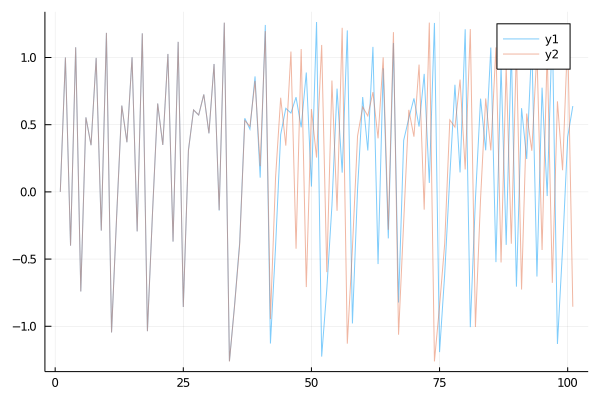

In [21]:
using LinearAlgebra: norm

# Plot the x-coordinate of the two trajectories:
#ax1 = subplot(2,1,1)
plot([tr1[:, 1],tr2[:, 1]], alpha = 0.5)
#plot(tr2[:, 1], alpha = 0.5)
#ylabel("x")


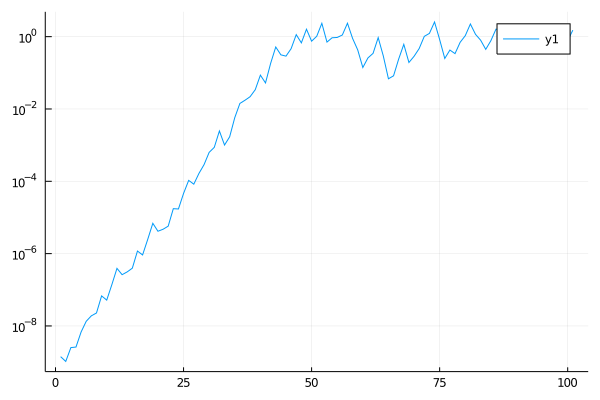

In [29]:
# Plot their distance in a semilog plot:
#ax2 = subplot(2,1,2, sharex = ax1)
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
#ylabel("d"); xlabel("n"); 
#semilogy(d);
plot(d, yaxis=:log) 

The initial slope of the d vs n plot (before the curve saturates) is approximately the maximum Lyapunov exponent

# EX 2

In [142]:
using DynamicalSystems
ds = Systems.towel()
λλ = lyapunov(ds, 10000)

0.4325272992490464

In [143]:
lor = Systems.lorenz(ρ = 32.0) #this is not the original parameter!
λλ = lyapunov(lor, 10000, dt = 0.1)

0.9920253706553216

In [144]:
lor

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 32.0, 2.6666666666666665]

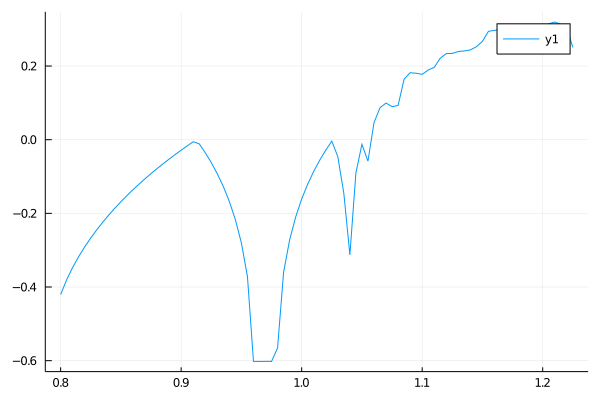

In [140]:
he = Systems.henon()
as = 0.8:0.005:1.225; λs = zeros(length(as))
for (i, a) in enumerate(as)
    set_parameter!(he, 1, a)
    λs[i] = lyapunov(he, 10000; Ttr = 500)
end

plot(as, λs)

# Defining new dynamical systems

In [214]:
#using DynamicalSystems # also exports relevant StaticArrays names
# Lorenz system
# Equations of motion:
@inline @inbounds function loop(u, p, t)
    σ = p[1]; ρ = p[2]; β = p[3]
    du1 = σ*(u[2]-u[1])
    du2 = u[1]*(ρ-u[3]) - u[2]
    du3 = u[1]*u[2] - β*u[3]
    return SVector{3}(du1, du2, du3)
end
# Jacobian:
@inline @inbounds function loop_jac(u, p, t)
    σ, ρ, β = p
    J = @SMatrix [-σ  σ  0;
    ρ - u[3]  (-1)  (-u[1]);
    u[2]   u[1]  -β]
    return J
end

ds = ContinuousDynamicalSystem(loop, [0.0, 10.0, 0.0], [10.0, 32.0, 8/3], loop_jac)

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 32.0, 2.6666666666666665]

In [215]:
lyapunov(ds, 10000, dt = 0.1)

0.9920253706553216

In [220]:
@inline @inbounds function predprey(u, p, t)
    m = p[1]; k = p[2]; c=p[3]; T = p[4]; A=p[5];
    du1 = u[1]*(1-u[1]/k)-m*u[2]*u[1]/(1+u[1])
    du2 = -c*u[2]+m*u[1]*u[2]/(1+u[1])
    if t%T==0
        du1 = du1-A*sin(2*π*u[1])
    end
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function predprey_jac(u, p, t)
    m,k,c,T,A= p
    if t%T==0
        J = @SMatrix [(1-2*u[1]/k +m*u[1]*u[2]/(1+u[1])^2 - m*u[2]/(1+u[1])-A*cos(2*π*u[1])) -m*u[1]/(1+u[1]);
        (-m*u[1]*u[2]/(1+u[1])^2 + m*u[2]/(1+u[1])) (-c+m*u[1]/(1+u[1]))]
    else
         J = @SMatrix [(1-2*u[1]/k +m*u[1]*u[2]/(1+u[1])^2 - m*u[2]/(1+u[1])) -m*u[1]/(1+u[1]);
        (-m*u[1]*u[2]/(1+u[1])^2 + m*u[2]/(1+u[1])) (-c+m*u[1]/(1+u[1]))]
    end
        return J
end

ds = ContinuousDynamicalSystem(predprey, [1,5], [3.0,3.0,1.0,10,1], predprey_jac)

2-dimensional continuous dynamical system
 state:       [1, 5]
 e.o.m.:      predprey
 in-place?    false
 jacobian:    predprey_jac
 parameters:  [3.0, 3.0, 1.0, 10.0, 1.0]

In [219]:
lyapunov(ds, 10000, dt = .1)

0.00018242044966391524

In [153]:
@inline @inbounds function lin_model(u, p, t)
    σ = p[1]; λ = p[2]; A = p[3]; T=p[4]
    du1 = 1+σ*u[2]
    du2 = -λ*u[2]
    if t%T==0
        du2 = du2+A*sin(2*π*u[1])
    end
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function lin_model_jac(u, p, t)
    σ,λ,A,T=p
    if t%T==0
        J = @SMatrix [0 σ;
        2*π*A*cos(2*π*u[1])   -λ]
    else
        J = @SMatrix [0 σ;
        0   -λ]
    end
    return J
end

ds = ContinuousDynamicalSystem(lin_model, [.01, .01], [3.0,0.1,0.1,10], lin_model_jac)

2-dimensional continuous dynamical system
 state:       [0.01, 0.01]
 e.o.m.:      lin_model
 in-place?    false
 jacobian:    lin_model_jac
 parameters:  [3.0, 0.1, 0.1, 10.0]

In [211]:
lyapunov(ds, 1000, dt = 0.1)

0.0018761449628898993

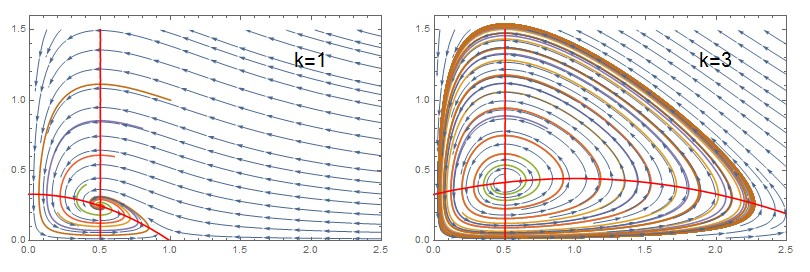